In [138]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

epsilon = 1e-6

def normalize_logspec_A(coordinate):
    """
    Utility function for rotating a LogSpec tuple (targeting A)
    into its normal form.

    Expects a sorted input in the range [0, 1].
    """
    total = sum(coordinate)
    if total > epsilon:
        return normalize_logspec_A([*coordinate[1:], coordinate[0] - 1])
    elif total < -epsilon:
        raise ValueError(
            f"Over-rotated: {total}. I don't think this should happen."
        )
    else:
        return coordinate


def normalize_logspec_AC2(coordinate):
    """
    Utility function for rotating a LogSpec tuple (targeting A_{C_2})
    into its normal form.

    Expects a sorted input in the range [0, 1].
    """
    partially_normalized_coordinate = normalize_logspec_A(coordinate)
    if partially_normalized_coordinate[1] >= \
            -partially_normalized_coordinate[2]:
        return partially_normalized_coordinate
    else:
        return [partially_normalized_coordinate[2] + 1 / 2,
                partially_normalized_coordinate[3] + 1 / 2,
                partially_normalized_coordinate[0] - 1 / 2,
                partially_normalized_coordinate[1] - 1 / 2]

def unitary_to_monodromy_coordinate(unitary):
    """
    Given a unitary matrix, produces its alcove coordinate.
    """
    unitary = unitary * np.complex128(np.linalg.det(unitary)) ** (-1 / 4)
    sysy = np.array([
        [0,  0,  0, 1],
        [0,  0, -1, 0],
        [0, -1,  0, 0],
        [1,  0,  0, 0],
    ], dtype=complex)
    gammaQ = reduce(np.dot, [unitary, sysy, unitary.T, sysy])
    logspec_coordinate = np.real(
        np.log(np.linalg.eigvals(gammaQ)) / (2 * np.pi * 1j))
    return normalize_logspec_AC2(
        sorted(np.mod(logspec_coordinate, 1.0), reverse=True)
    )

def monodromy_to_positive_canonical_coordinate(x, y, z):
    """
    Given a monodromy alcove coordinate, produces its image as an unnormalized positive canonical coordinate. Take the first three of the four monodromy coordinates.
    """
    normalizing_factor = np.pi
    return (
        (x + y) / 2 * normalizing_factor,
        (z + x) / 2 * normalizing_factor,
        (y + z) / 2 * normalizing_factor
    )

def generate_random_hermitian_matrix(n):
    # Step 1: Create a random complex matrix
    A = np.random.randn(n, n) + 1j * np.random.randn(n, n)
    
    # Step 2: Make the matrix Hermitian
    H = (A + A.conj().T) / 2
    
    return H

In [324]:
XX = lambda theta: np.array([[np.cos(theta), 0, 0, -1j*np.sin(theta)], 
                             [0, np.cos(theta), -1j*np.sin(theta), 0], 
                             [0, -1j*np.sin(theta), np.cos(theta), 0], 
                             [-1j*np.sin(theta), 0, 0, np.cos(theta)]])

In [315]:
unitary_to_monodromy_coordinate(XX(1/4))

[0.25, 0.25, -0.25, -0.25]

In [161]:
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, 1j], [-1j, 0]])

XX = np.kron(X, X)
YY = np.kron(Y, Y)

In [307]:
# Generate unitary
# Convert to monodromy
# Convert to positive canonical coordinate
# Plot

# Example usage
n = 4  # Size of the matrix
a, b = -4, 5
H = a*XX+b*YY

coord_list = []
for t in np.random.uniform(0, 1/4, 10000):
    U = expm(1j*H*np.pi*t)
    x, y, z = unitary_to_monodromy_coordinate(U)[:3]
    coord_list.append(np.round(monodromy_to_positive_canonical_coordinate(x/np.pi, y/np.pi, z/np.pi), 10))

In [308]:
# Extract x, y, and z coordinates
x_coord, y_coord, z_coord = zip(*coord_list)

In [309]:
np.sum(z_coord)

0.0

Text(0.5, 0, 'Z Label')

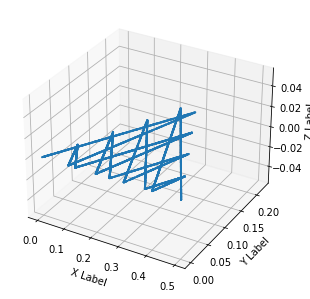

In [310]:
fig = plt.figure(figsize = [5, 10])
ax = fig.add_subplot(projection='3d')

ax.scatter(x_coord, y_coord, z_coord, s = 1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

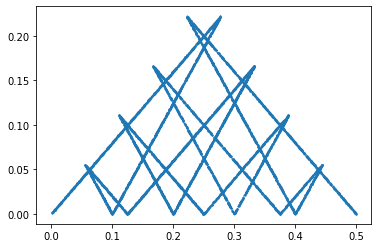

In [311]:
plt.scatter(x_coord, y_coord, s = 1)

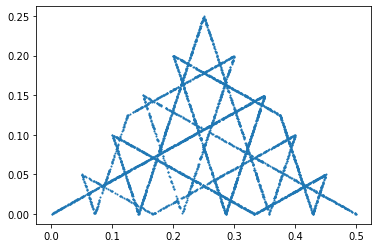

In [286]:
plt.scatter(x_coord, y_coord, s = 1)

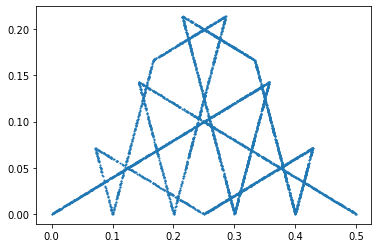

In [280]:
plt.scatter(x_coord, y_coord, s = 1)

In [371]:
XX = lambda theta: np.array([[np.cos(theta), 0, 0, -1j*np.sin(theta)], 
                             [0, np.cos(theta), -1j*np.sin(theta), 0], 
                             [0, -1j*np.sin(theta), np.cos(theta), 0], 
                             [-1j*np.sin(theta), 0, 0, np.cos(theta)]])

YY = lambda theta: np.array([[np.cos(theta), 0, 0, 1j*np.sin(theta)], 
                             [0, np.cos(theta), -1j*np.sin(theta), 0], 
                             [0, -1j*np.sin(theta), np.cos(theta), 0], 
                             [1j*np.sin(theta), 0, 0, np.cos(theta)]])

XY = lambda theta: XX(theta)@YY(theta)

In [392]:
x_list = []
y_list = []
n = 1000
angle = np.pi

for theta in np.linspace(0, angle, n):

    x_list.append(unitary_to_monodromy_coordinate(XY(theta))[0])

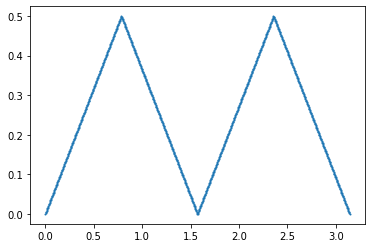

In [393]:
plt.scatter(np.linspace(0, angle, n), x_list, s = 1)

In [322]:
CZ = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, -1]])

In [323]:
unitary_to_monodromy_coordinate(CZ)

[0.25000000000000006, 0.25000000000000006, -0.25, -0.25]

In [373]:
unitary_to_monodromy_coordinate(XY(np.pi/4))

[0.49999999999999994, 0.0, 0.0, -0.5]

In [375]:
from sympy import *

In [374]:
XY(2)

array([[ 1.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  0.        +0.j       ],
       [ 0.        +0.j       , -0.65364362+0.j       ,
         0.        +0.7568025j,  0.        +0.j       ],
       [ 0.        +0.j       ,  0.        +0.7568025j,
        -0.65364362+0.j       ,  0.        +0.j       ],
       [ 0.        +0.j       ,  0.        +0.j       ,
         0.        +0.j       ,  1.        +0.j       ]])

In [378]:
np.cos(4)

-0.6536436208636119

In [386]:
unitary_to_monodromy_coordinate(XY(0.12))

[0.07639437268410977, 0.0, 0.0, -0.07639437268410976]

In [510]:
from time import perf_counter

import sys

sys.path.insert(1, "/Users/minhpham/Documents/Research/laughing-umbrella/xx_synthesis/monodromy/")

import monodromy

from monodromy.coordinates import monodromy_alcove, monodromy_alcove_c2, monodromy_to_positive_canonical_polytope, rho_reflect
from monodromy.elimination import cylinderize, project
from monodromy.polytopes import ConvexPolytope, Polytope
from monodromy.static import qlr_polytope

from itertools import count

biswas_relations = (qlr_polytope
    # enlarge to the pu_4 version of the QLR relations
    .union(rho_reflect(qlr_polytope, [0, 7, 8, 9]))
    # constrain in- and out-coordinates to the appropriate alcove
    .intersect(cylinderize(monodromy_alcove, [0, 1, 2, 3], 10))
    .intersect(cylinderize(monodromy_alcove_c2, [0, 7, 8, 9], 10))
)

# constrain interaction coordinates to be of XY-type
biswas_relations = biswas_relations.intersect(Polytope(convex_subpolytopes=[
    ConvexPolytope(
        inequalities=[[1, 0, 0, 0, -2, 0, 0, 0, 0, 0]],
        equalities=[
            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # x2 == 0
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # x3 == 0
        ]
    )
]))

# switch to canonical coordinates
biswas_relations = monodromy_to_positive_canonical_polytope(
    biswas_relations, coordinates=[0, 1, 2, 3])
biswas_relations = monodromy_to_positive_canonical_polytope(
    biswas_relations, coordinates=[0, 4, 5, 6])
biswas_relations = monodromy_to_positive_canonical_polytope(
    biswas_relations, coordinates=[0, 7, 8, 9])

# reduce the biswas relations to have following coordinates:
# k a1 a2 a3 beta b1 b2 b3
biswas_relations = biswas_relations.reduce()
biswas_relations = project(biswas_relations, 6).reduce()
biswas_relations = project(biswas_relations, 5).reduce()
    
xy_polytope = monodromy.static.examples.identity_polytope
for n in range(1, 5):
    print(f"Working on an xy interaction sequence of length {n}...")
    
    # inflate xy_polytope from [*a_coords, *interaction_coords] to [*a_coords, *b_coords, *interaction_coords, beta]
    xy_polytope = cylinderize(
        xy_polytope,
        coordinate_map=[0, 1, 2, 3] + list(range(7, 7 + (n - 1))),
        parent_dimension=1 + 3 + 3 + n,
    ).intersect(cylinderize(
        biswas_relations,
        coordinate_map=[0, 1, 2, 3, -1, 4, 5, 6],
        parent_dimension=1 + 3 + 3 + n,
    ))
    
    # project away the old a-coordinates
    start_time = perf_counter()
    print("Working on the reduction 1/3...", end="")
    xy_polytope = project(xy_polytope, 3).reduce()
    print(f" done.  Took {perf_counter() - start_time} seconds.")

    start_time = perf_counter()
    print("Working on the reduction 2/3...", end="")
    xy_polytope = project(xy_polytope, 2).reduce()
    print(f" done.  Took {perf_counter() - start_time} seconds.")

    start_time = perf_counter()
    print("Working on the reduction 3/3...", end="")
    xy_polytope = project(xy_polytope, 1).reduce()
    print(f" done.  Took {perf_counter() - start_time} seconds.")
    
    # now the old c-coordinates are sitting where the a-coordinates were!
    print("The first three coordinates are the canonical coordinates CAN(x1, x2, x3).")
    print("The remaining coordinates x4, ..., xk are the xy interaction strengths.")
    print(xy_polytope)


Working on an xy interaction sequence of length 1...
Working on the reduction 1/3... done.  Took 0.1657105479389429 seconds.
Working on the reduction 2/3... done.  Took 0.14627480204217136 seconds.
Working on the reduction 3/3... done.  Took 0.14076087204739451 seconds.
The first three coordinates are the canonical coordinates CAN(x1, x2, x3).
The remaining coordinates x4, ..., xk are the xy interaction strengths.
[
# origin ∩ anonymous_convex_polytope_127: 
    1 +    -2 x1 +     0 x2 +     0 x3 +     0 x4 >= 0
    0 +     1 x1 +     0 x2 +     0 x3 +     0 x4 >= 0
    0 +    -1 x1 +     1 x2 +     0 x3 +     0 x4 == 0
    0 +     0 x1 +     0 x2 +     1 x3 +     0 x4 == 0
    0 +    -1 x1 +     0 x2 +     0 x3 +     1 x4 == 0
,
# origin ∩ anonymous_convex_polytope_128: 
    1 +    -1 x1 +     0 x2 +     0 x3 +     0 x4 >= 0
   -1 +     2 x1 +     0 x2 +     0 x3 +     0 x4 >= 0
   -1 +     1 x1 +     1 x2 +     0 x3 +     0 x4 == 0
    0 +     0 x1 +     0 x2 +     1 x3 +     0 x4 ==

KeyboardInterrupt: 

In [503]:
def print_table(data, no_extra_rows, name):
    # Define the headers
    headers = ["1", "alpha", "beta", "delta"] + [f"a_{i+1}" for i in range(no_extra_rows)]
    
    data = sorted(data)
    
    # Ensure that the data length matches the number of headers
    if not all(len(row) == len(headers) for row in data):
        raise ValueError("All rows in the data must have the same length as the headers.")
    
    # Calculate the maximum width for each column
    col_widths = [max(len(str(item)) for item in [header] + [row[i] for row in data]) for i, header in enumerate(headers)]
    
    # Define a function to print a single row with given data and column widths
    def print_row(row):
        print(" | ".join(f"{str(item).ljust(col_widths[i])}" for i, item in enumerate(row)))
    
    # Print name
    print(f"{name} ({len(data)} inequalities)\n")
    
    # Print the headers
    print_row(headers)
    print("-+-".join("-" * width for width in col_widths))
    
    # Print each row of data
    for row in data:
        print_row(row)
        
    print("\n")

def classify(ineq_system):
    
    interaction_ineq, CAN_ineq, total_strength_ineq, slant_ineq, height_ineq, other_ineq = [], [], [], [], [], []
    for ineq in ineq_system:
        if ineq[1:4] == [0, 0, 0]:
            interaction_ineq.append(ineq)
        elif ineq[4:] == [0 for i in range(len(ineq[4:]))]:
            CAN_ineq.append(ineq)
        elif ineq[1:4] == [-1, -1, -1]:
            total_strength_ineq.append(ineq)
        elif ineq[1:4] == [1, -1, -1]:
            slant_ineq.append(ineq)
        elif ineq[1:4] == [0, 0, -1]:
            height_ineq.append(ineq)
        else:
            other_ineq.append(ineq)
    
    n = 4
    print_table(interaction_ineq, n, "Interaction Ineq")
    print_table(CAN_ineq, n, "CAN Ineq")
    print_table(total_strength_ineq, n, "Total Strength Ineq")
    print_table(slant_ineq, n, "Slant Ineq")
    print_table(height_ineq, n, "Height Ineq")
    print_table(other_ineq, n, "Other Ineq")
                
    return interaction_ineq, CAN_ineq, total_strength_ineq, slant_ineq, height_ineq, other_ineq

In [504]:
interaction_ineq, CAN_ineq, total_strength_ineq, slant_ineq, height_ineq, other_ineq = classify(xy_polytope.convex_subpolytopes[0].inequalities)

Interaction Ineq (6 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
0 | 0     | 0    | 0     | 0   | 0   | 1  
0 | 0     | 0    | 0     | 0   | 1   | 0  
0 | 0     | 0    | 0     | 1   | 0   | 0  
1 | 0     | 0    | 0     | -2  | 0   | 0  
1 | 0     | 0    | 0     | 0   | -2  | 0  
1 | 0     | 0    | 0     | 0   | 0   | -2 


CAN Ineq (4 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
0 | 0     | 0    | 1     | 0   | 0   | 0  
0 | 0     | 1    | -1    | 0   | 0   | 0  
0 | 1     | -1   | 0     | 0   | 0   | 0  
1 | -1    | -1   | 0     | 0   | 0   | 0  


Total Strength Ineq (7 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
0 | -1    | -1   | -1    | 2   | 2   | 2  
2 | -1    | -1   | -1    | -2  | 0   | 2  
2 | -1    | -1   | -1    | -2  | 2   | 0  
2 | -1    | -1   | -1    | 0   | -2  | 2  
2 | -1    | -1   | -1    | 0   | 2  

In [505]:
interaction_ineq, CAN_ineq, total_strength_ineq, slant_ineq, height_ineq, other_ineq = classify(xy_polytope.convex_subpolytopes[1].inequalities)

Interaction Ineq (6 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
0 | 0     | 0    | 0     | 0   | 0   | 1  
0 | 0     | 0    | 0     | 0   | 1   | 0  
0 | 0     | 0    | 0     | 1   | 0   | 0  
1 | 0     | 0    | 0     | -2  | 0   | 0  
1 | 0     | 0    | 0     | 0   | -2  | 0  
1 | 0     | 0    | 0     | 0   | 0   | -2 


CAN Ineq (4 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
0 | 0     | 0    | 1     | 0   | 0   | 0  
0 | 0     | 1    | -1    | 0   | 0   | 0  
0 | 1     | -1   | 0     | 0   | 0   | 0  
1 | -1    | -1   | 0     | 0   | 0   | 0  


Total Strength Ineq (3 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
1 | -1    | -1   | -1    | 0   | 0   | 2  
1 | -1    | -1   | -1    | 0   | 2   | 0  
1 | -1    | -1   | -1    | 2   | 0   | 0  


Slant Ineq (7 inequalities)

1  | alpha | beta | delta | a_1 | a_2 | a_3
---+

In [506]:
interaction_ineq, CAN_ineq, total_strength_ineq, slant_ineq, height_ineq, other_ineq = classify(xy_polytope.convex_subpolytopes[2].inequalities)

Interaction Ineq (5 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
0 | 0     | 0    | 0     | 0   | 1   | 0  
0 | 0     | 0    | 0     | 1   | 0   | 0  
1 | 0     | 0    | 0     | -2  | 0   | 0  
1 | 0     | 0    | 0     | 0   | -2  | 0  
1 | 0     | 0    | 0     | 0   | 0   | -2 


CAN Ineq (4 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
0 | 0     | 0    | 1     | 0   | 0   | 0  
0 | 0     | 1    | -1    | 0   | 0   | 0  
0 | 1     | -1   | 0     | 0   | 0   | 0  
1 | -1    | -1   | 0     | 0   | 0   | 0  


Total Strength Ineq (2 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
1 | -1    | -1   | -1    | 0   | 2   | 0  
1 | -1    | -1   | -1    | 2   | 0   | 0  


Slant Ineq (4 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
1 | 1     | -1   | -1    | -2  | 2   | 0  
1 | 1

In [507]:
interaction_ineq, CAN_ineq, total_strength_ineq, slant_ineq, height_ineq, other_ineq = classify(xy_polytope.convex_subpolytopes[3].inequalities)

Interaction Ineq (5 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
0 | 0     | 0    | 0     | 0   | 1   | 0  
0 | 0     | 0    | 0     | 1   | 0   | 0  
1 | 0     | 0    | 0     | -2  | 0   | 0  
1 | 0     | 0    | 0     | 0   | -2  | 0  
1 | 0     | 0    | 0     | 0   | 0   | -2 


CAN Ineq (4 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
0 | 0     | 0    | 1     | 0   | 0   | 0  
0 | 0     | 1    | -1    | 0   | 0   | 0  
0 | 1     | -1   | 0     | 0   | 0   | 0  
1 | -1    | -1   | 0     | 0   | 0   | 0  


Total Strength Ineq (4 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+-------+------+-------+-----+-----+----
2 | -1    | -1   | -1    | -2  | 2   | 0  
2 | -1    | -1   | -1    | 0   | 2   | -2 
2 | -1    | -1   | -1    | 2   | -2  | 0  
2 | -1    | -1   | -1    | 2   | 0   | -2 


Slant Ineq (2 inequalities)

1 | alpha | beta | delta | a_1 | a_2 | a_3
--+--